In [1]:
import pandas as pd
df = pd.read_csv('nigeria_data.csv')
df.head(10)

,iu_code,year,total_population,endemicity,latitude,longitude,jan_precip,feb_precip,mar_precip,apr_precip,...,oct_temp,oct_max_temp,nov_temp,nov_max_temp,dec_temp,dec_max_temp,ann_avg_temp,ann_max_temp,previous_five_year_outbreak,outbreak_indicator
0,NGA0377536337,2014,0.310159,"[1, 0]",5.333333,7.316667,0.555084,0.614201,0.557491,0.603998,...,0.440952,0.241636,0.537900,0.355322,0.752220,0.356712,0.485207,0.161290,0.0,100.0
1,NGA0377536337,2015,0.319468,"[1, 0]",5.333333,7.316667,0.200301,0.630722,0.679992,0.526970,...,0.448571,0.257745,0.538813,0.317841,0.545601,0.221719,0.453254,0.152161,1.0,100.0
2,NGA0377536337,2016,0.325850,"[1, 0]",5.333333,7.316667,0.379128,0.392994,0.713262,0.598957,...,0.466667,0.273854,0.578995,0.282609,0.719128,0.358974,0.501775,0.240414,1.0,100.0
3,NGA0377536337,2017,0.332236,"[1, 0]",5.333333,7.316667,0.453054,0.320473,0.675225,0.661074,...,0.463810,0.267038,0.526941,0.298351,0.740920,0.319005,0.493491,0.168594,1.0,28.0
4,NGA0377536337,2018,0.338619,"[1, 0]",5.333333,7.316667,0.200301,0.800813,0.636440,0.556822,...,0.464762,0.264560,0.578995,0.351574,0.719128,0.353695,0.476923,0.202678,1.0,30.0
5,NGA0377536337,2019,0.334447,"[1, 0]",5.333333,7.316667,0.607535,0.535815,0.548895,0.427738,...,0.407619,0.218711,0.569863,0.307346,0.706215,0.351433,0.499408,0.142422,1.0,31.0
6,NGA0377536337,2020,0.340339,"[1, 0]",5.333333,7.316667,0.000000,0.247952,0.732311,0.624532,...,0.440952,0.265799,0.565297,0.320090,0.766747,0.352187,0.492308,0.178332,1.0,100.0
7,NGA0377536337,2021,0.346948,"[1, 0]",5.333333,7.316667,0.607535,0.348044,0.602391,0.681648,...,0.470476,0.308550,0.540639,0.266867,0.682002,0.351433,0.494675,0.148509,1.0,30.0
8,NGA0377536337,2022,0.353602,"[1, 0]",5.333333,7.316667,0.803443,0.247952,0.582878,0.665766,...,0.482857,0.293061,0.548858,0.311844,0.686037,0.336350,0.469822,0.269629,1.0,33.0
9,NGA0377536337,2023,0.359985,"[0, 1]",5.333333,7.316667,0.354783,0.552862,0.665183,0.586844,...,0.512381,0.325279,0.568037,0.305097,0.765940,0.424585,0.520710,0.192331,1.0,0.0


PCA

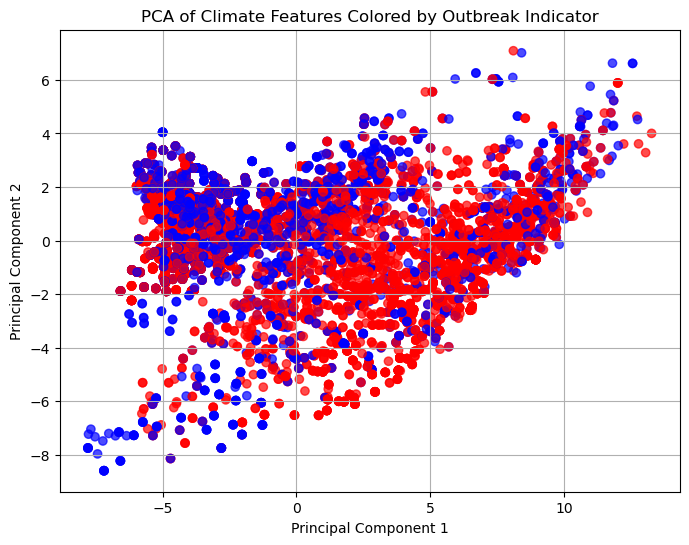

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Select only climate-related features (precipitation and temperature columns)
climate_features = [col for col in df.columns if 'precip' in col or 'temp' in col]
climate_data = df[climate_features]

# Standardize the data
scaler = StandardScaler()
climate_scaled = scaler.fit_transform(climate_data)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
climate_pca = pca.fit_transform(climate_scaled)

# Use outbreak indicator to determine the color (0 or 1)
color_labels = df['outbreak_indicator'].apply(lambda x: 1 if x > 0 else 0)

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(climate_pca[:, 0], climate_pca[:, 1], c=color_labels, cmap='bwr', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Climate Features Colored by Outbreak Indicator')
plt.grid(True)
plt.show()

LOGISTIC RGRESSION

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

climate_features = [col for col in df.columns if 'precip' in col or 'temp' in col]
X = df[climate_features]

# Assuming threshold: outbreak occurred if outbreak_indicator > 50
y = (df['outbreak_indicator'] > 50).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()


,precision,recall,f1-score,support
0,0.817879,0.988710,0.895217,1240.000000
1,0.714286,0.113636,0.196078,308.000000
accuracy,0.814599,0.814599,0.814599,0.814599
macro avg,0.766082,0.551173,0.545648,1548.000000
weighted avg,0.797267,0.814599,0.756112,1548.000000


RANDOM FOREST

In [4]:

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
pd.DataFrame(rf_report).transpose()

,precision,recall,f1-score,support
0,0.865844,0.905645,0.885298,1240.000000
1,0.533865,0.435065,0.479428,308.000000
accuracy,0.812016,0.812016,0.812016,0.812016
macro avg,0.699854,0.670355,0.682363,1548.000000
weighted avg,0.799791,0.812016,0.804543,1548.000000


In [24]:

# 1. set features
climate_precip = [f"{m}_precip" for m in ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]
climate_temp = [f"{m}_temp" for m in ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]
climate_max_temp = [f"{m}_max_temp" for m in ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]
yearly_climate = ['ann_avg_temp', 'ann_max_temp']
other_features = ['latitude', 'longitude', 'total_population', 'previous_five_year_outbreak']

# 2. merge all features
features = climate_precip + climate_temp + climate_max_temp + yearly_climate + other_features

# 3. create x and y（set outbreak_indicator >= 50 as“outbreak”）
X = df[features]
y = (df['outbreak_indicator'] >= 50).astype(int)

In [3]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:

from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100,
    scale_pos_weight=1218/330,
    eval_metric='logloss'  # 避免warning
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [6]:
import joblib

# 保存模型到本地文件
joblib.dump(model, "xgb_model.pkl")

['xgb_model.pkl']

In [7]:
model.save_model("xgb_model.json")

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1103  115]
 [  93  237]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1218
           1       0.67      0.72      0.70       330

    accuracy                           0.87      1548
   macro avg       0.80      0.81      0.80      1548
weighted avg       0.87      0.87      0.87      1548



In [9]:

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [10]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'scale_pos_weight': [1218/330, 4.0, 6.0]  # 尝试不同类别权重
}

In [11]:
xgb = XGBClassifier(eval_metric='logloss')  # 避免 warning

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',           # 针对爆发类不平衡问题，用 F1-score 优化
    cv=5,                   # 5折交叉验证
    n_jobs=-1,              # 并行加速
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'scale_pos_weight': [3.690909090909091, 4.0, 6.0]},
             scoring='f1', verbose=1)

In [12]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[1082  136]
 [  73  257]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1218
           1       0.65      0.78      0.71       330

    accuracy                           0.86      1548
   macro avg       0.80      0.83      0.81      1548
weighted avg       0.88      0.86      0.87      1548



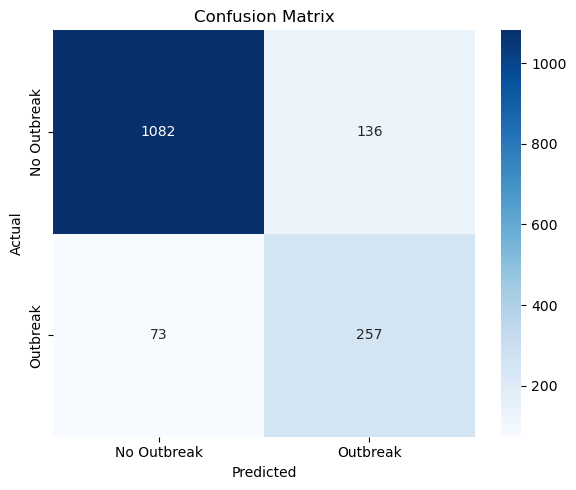

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1218
           1       0.65      0.78      0.71       330

    accuracy                           0.86      1548
   macro avg       0.80      0.83      0.81      1548
weighted avg       0.88      0.86      0.87      1548



In [15]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Outbreak", "Outbreak"],
            yticklabels=["No Outbreak", "Outbreak"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_best))

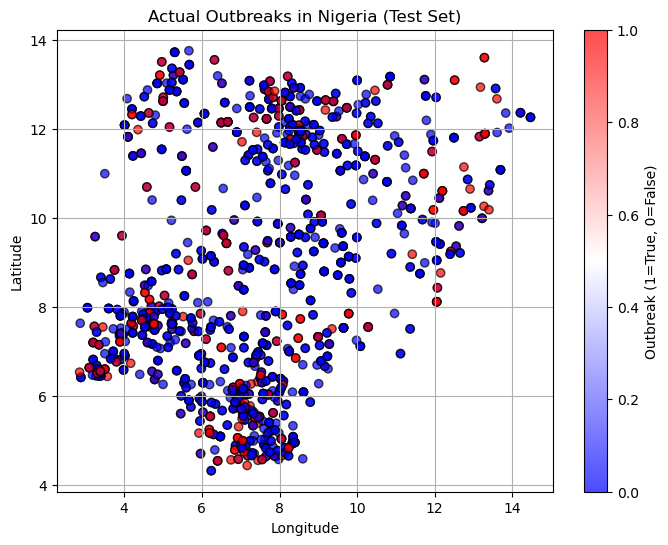

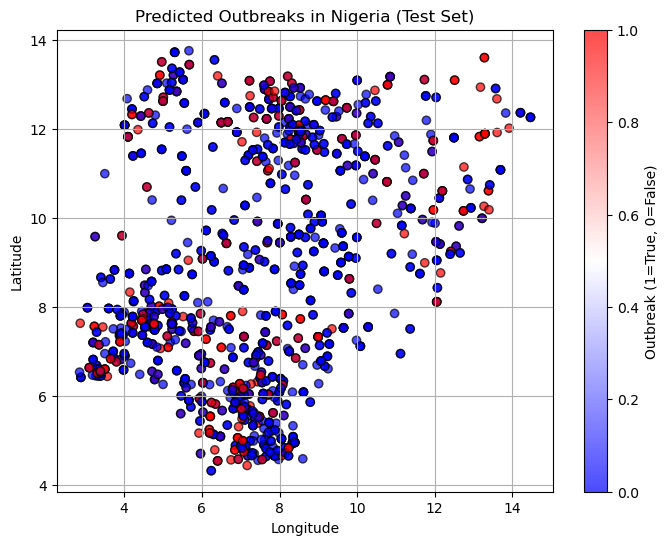

In [16]:
import numpy as np

# Add predictions and actual labels to the test set
X_test_with_labels = X_test.copy()
X_test_with_labels['latitude'] = df.loc[X_test.index, 'latitude']
X_test_with_labels['longitude'] = df.loc[X_test.index, 'longitude']
X_test_with_labels['actual'] = y_test
X_test_with_labels['predicted'] = y_pred_best

# Function to plot heatmap of Nigeria using latitude and longitude
def plot_heatmap(data, label_col, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['longitude'], data['latitude'], 
                c=data[label_col], cmap='bwr', alpha=0.7, edgecolor='k')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.colorbar(label='Outbreak (1=True, 0=False)')
    plt.grid(True)
    plt.show()

# Plot actual outbreaks
plot_heatmap(X_test_with_labels, 'actual', 'Actual Outbreaks in Nigeria (Test Set)')

# Plot predicted outbreaks
plot_heatmap(X_test_with_labels, 'predicted', 'Predicted Outbreaks in Nigeria (Test Set)')


/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:13:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


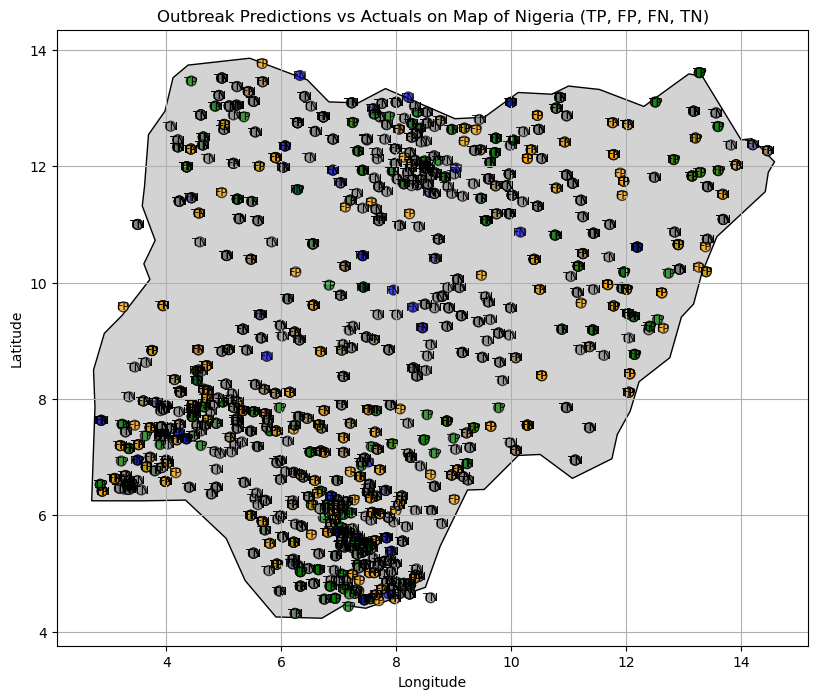

In [19]:
# Re-run model training with reduced complexity
from xgboost import XGBClassifier

# Simplified model to avoid timeout
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=1218/330,
    eval_metric='logloss',
    use_label_encoder=False
)
model.fit(X_train, y_train)
y_pred_best = model.predict(X_test)

# Add actual and predicted labels
X_test_map = X_test.copy()
X_test_map['actual'] = y_test.values
X_test_map['predicted'] = y_pred_best
X_test_map['latitude'] = df.loc[X_test.index, 'latitude']
X_test_map['longitude'] = df.loc[X_test.index, 'longitude']

# Reload Nigeria map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")
nigeria = world[world['ADMIN'] == 'Nigeria']

# Create GeoDataFrame
X_test_map_gdf = gpd.GeoDataFrame(
    X_test_map,
    geometry=gpd.points_from_xy(X_test_map['longitude'], X_test_map['latitude']),
    crs="EPSG:4326"
)

# Define colors and labels
def label_and_color(row):
    if row['actual'] == 1 and row['predicted'] == 1:
        return 'green', 'TP'
    elif row['actual'] == 1 and row['predicted'] == 0:
        return 'blue', 'FN'
    elif row['actual'] == 0 and row['predicted'] == 1:
        return 'orange', 'FP'
    else:
        return 'grey', 'TN'

X_test_map_gdf['color'], X_test_map_gdf['label'] = zip(*X_test_map_gdf.apply(label_and_color, axis=1))

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
nigeria.plot(ax=ax, color='lightgrey', edgecolor='black')
X_test_map_gdf.plot(ax=ax, color=X_test_map_gdf['color'], markersize=50, alpha=0.7, edgecolor='black')

# Add label text on the map
for x, y, label in zip(X_test_map_gdf.geometry.x, X_test_map_gdf.geometry.y, X_test_map_gdf['label']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

plt.title("Outbreak Predictions vs Actuals on Map of Nigeria (TP, FP, FN, TN)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
